In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
opera_df = pd.read_csv(interim_dir+'opera_df_tox.csv', index_col = [0])

In [4]:
catmos = {}
for i, group in opera_df.groupby('group_str'):
    catmos[i] = group['CATMoS_LD50_pred'].values

In [5]:
def ecdf(data):
    '''
    Calculate the ecdf of a 1d-array
    Returns the x, y needed to plot the empirical ecdf
    '''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y


In [6]:
def catmos_summary(d, label = None):
    summary = {}
    summary['median'] = np.median(d)
    summary['ecdfx'], summary['ecdfy'] = ecdf(d)
    summary['label'] = label
    return summary

In [7]:
summaries = []
for k, v in catmos.items():
    summaries.append(catmos_summary(v, label = k))

In [8]:
pd.DataFrame(summaries)[['median', 'label']].sort_values(by = 'median', ascending = True).to_csv(interim_dir+'catmos_medians.csv')

In [9]:
pd.DataFrame(summaries)[['median', 'label']].sort_values(by = 'median', ascending = True).head()

,median,label
132,243.0,"('Organosulfur compounds', 2.0)"
2,245.0,"('Allenes', nan)"
70,250.0,"('Homogeneous non-metal compounds', 2.0)"
1,253.0,"('Alkaloids and derivatives', nan)"
137,253.5,"('Other', 3.0)"


In [10]:
pd.DataFrame(summaries)[['median', 'label']].sort_values(by = 'median', ascending = True).tail()

,median,label
46,7723.0,"('Benzenoids', 5.0)"
64,8670.5,"('Fatty Acyls', 3.0)"
42,8697.5,"('Benzenoids', 1.0)"
11,NaN,"('Anthracenes', 9.0)"
118,NaN,"('Organoheterocyclic compounds', 1.0)"


In [11]:
for i in range(len(summaries)):
    print(i, summaries[i]['label'])
    break
    46 ('Benzenoids', 5.0)
    64 ('Fatty Acyls', 3.0)

0 ('Acetylides', nan)


<>:4: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:5: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:4: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:5: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
/tmp/ipykernel_482709/1333174718.py:4: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  46 ('Benzenoids', 5.0)
/tmp/ipykernel_482709/1333174718.py:5: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  64 ('Fatty Acyls', 3.0)


In [12]:
for i in range(len(summaries)):
    if summaries[i]['label'] in ["('Benzenoids', 5.0)", "('Fatty Acyls', 3.0)","('Alkaloids and derivatives', nan)", "('Organosulfur compounds', 2.0)", "('Allenes', nan)"]:
        print(i)

1
2
46
64
132


In [13]:
#summaries[64]

In [16]:
import pickle


with open(interim_dir+ "summaries_catmos.pkl", "wb") as file:
    pickle.dump(summaries, file)

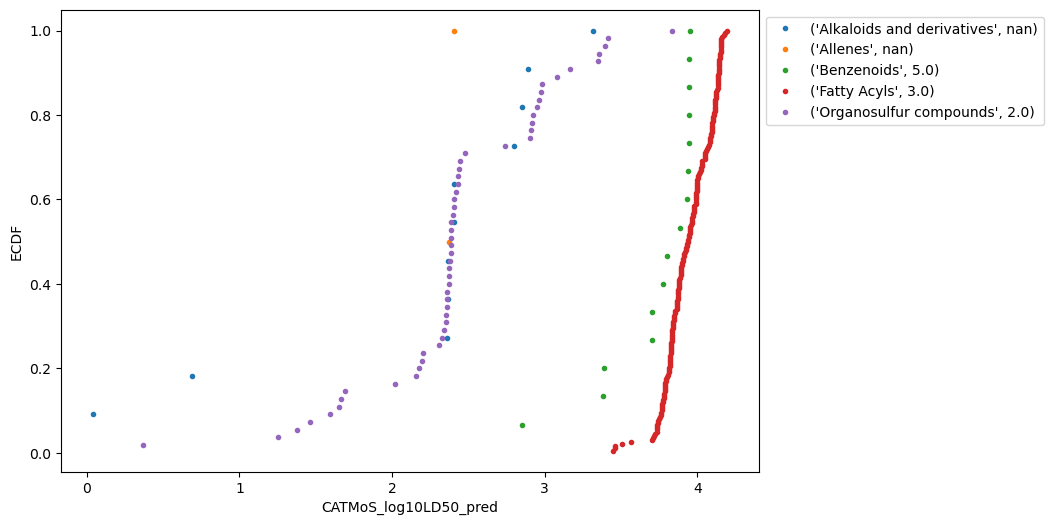

In [14]:
fig, ax = plt.subplots(figsize = (9,6))
for i in range(len(summaries)):
    if summaries[i]['label'] in ["('Benzenoids', 5.0)", "('Fatty Acyls', 3.0)","('Alkaloids and derivatives', nan)", "('Organosulfur compounds', 2.0)", "('Allenes', nan)"]:
        ax.set_xlabel('CATMoS_log10LD50_pred')
        ax.set_ylabel('ECDF')
        #ax.set_title('ECDFs of selected between Category-Subcategory combinations')
        ax.plot(np.log10(summaries[i]['ecdfx']),summaries[i]['ecdfy'], marker = '.', linestyle = 'none', label = summaries[i]['label']);
        ax.legend(bbox_to_anchor=(1, 1))
        